### 以下のDiscussionで示唆されている現象を調査する
https://www.kaggle.com/c/google-analytics-customer-revenue-prediction/discussion/65989

- 以下のカーネルでは、これに関する実験を行っている。  
https://www.kaggle.com/sevensteven/postprocessing-for-0-0001-improvement-on-pl

In [1]:
import feather
import missingno as msno
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
train = feather.read_dataframe('../data/interim/train.ftr')
test = feather.read_dataframe('../data/interim/test.ftr')
train.shape, test.shape

((903653, 55), (804684, 53))

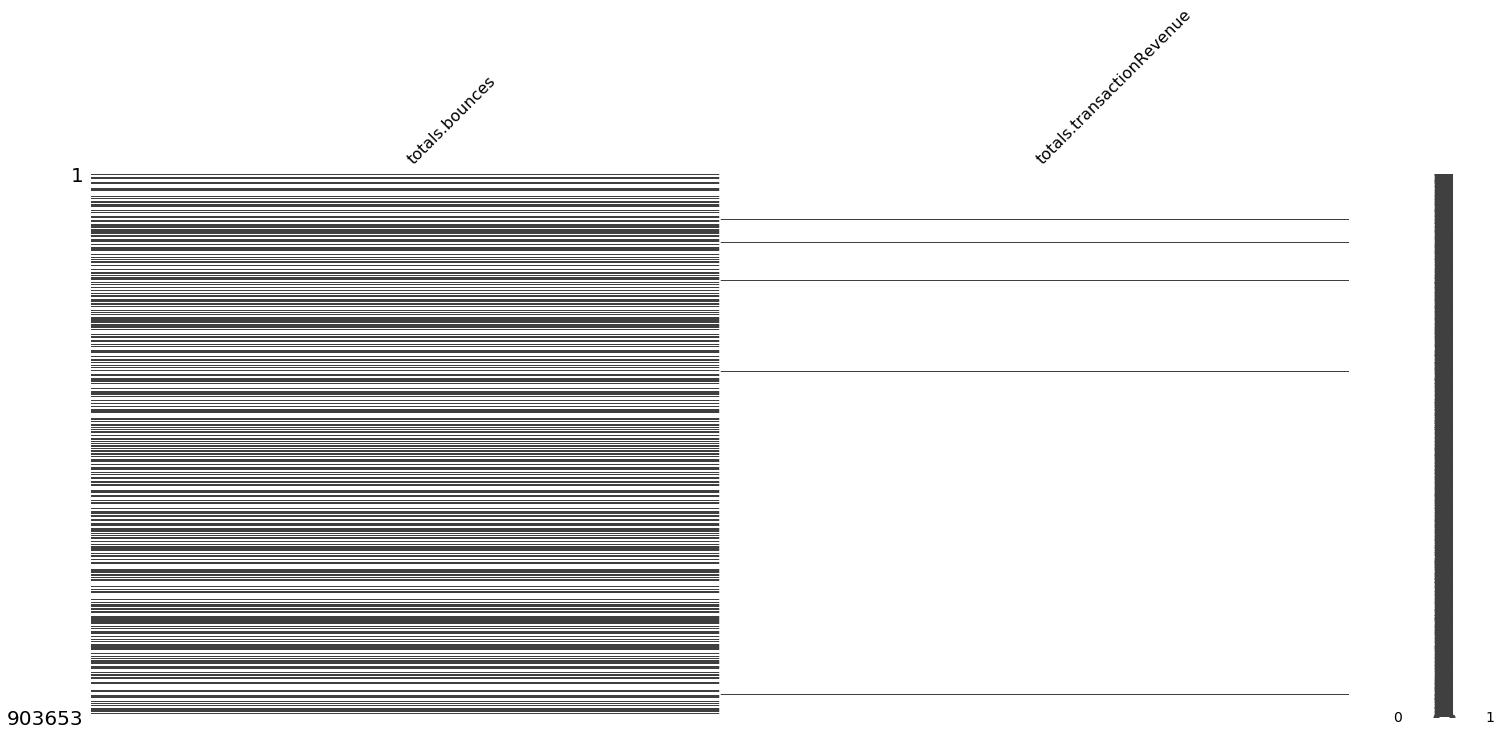

In [3]:
target_columns = ['totals.bounces', 'totals.transactionRevenue']
msno.matrix(train[target_columns])

In [4]:
# bounces
print('nunber of non-missing values:', train['totals.bounces'].notnull().sum(),
      'out of rows:', len(train),
      'and ratio is:', train['totals.bounces'].notnull().sum()/len(train))

nunber of non-missing values: 450630 out of rows: 903653 and ratio is: 0.49867592980934056


In [5]:
# transactionRevenue
print('nunber of non-missing values:', train['totals.transactionRevenue'].notnull().sum(),
      'out of rows:', len(train),
      'and ratio is:', train['totals.transactionRevenue'].notnull().sum()/len(train))

nunber of non-missing values: 11515 out of rows: 903653 and ratio is: 0.0127427231470487


bouncesに条件付けしたときのtransactionRevenueを集計する
- bouncesがNULLである場合、非欠損のtransactionRevenueが全て含まれる。
- bouncesがNULLでない場合、transactionRevenueは**必ず**NULLとなる。

In [6]:
bounces_null = train[train['totals.bounces'].isnull()]

print('nunber of non-missing values:', bounces_null['totals.transactionRevenue'].notnull().sum(),
      'out of rows:', len(bounces_null),
      'and ratio is:', bounces_null['totals.transactionRevenue'].notnull().sum()/len(bounces_null))

nunber of non-missing values: 11515 out of rows: 453023 and ratio is: 0.02541813550305393


In [7]:
bounces_notnull = train[train['totals.bounces'].notnull()]

print('nunber of non-missing values:', bounces_notnull['totals.transactionRevenue'].notnull().sum(),
      'out of rows:', len(bounces_notnull),
      'and ratio is:', bounces_notnull['totals.transactionRevenue'].notnull().sum()/len(bounces_notnull))

nunber of non-missing values: 0 out of rows: 450630 and ratio is: 0.0


つまり、testデータにおいて、bouncesがNULLでないレコードに対して予測値0を与えてやればよい

In [8]:
# bounces
print('nunber of non-missing values:', test['totals.bounces'].notnull().sum(),
      'out of rows:', len(test),
      'and ratio is:', test['totals.bounces'].notnull().sum()/len(test))

nunber of non-missing values: 420948 out of rows: 804684 and ratio is: 0.5231221199874734
